### **Detección de Sarcasmo en Texto

Se ocupa el dataset de dominio público “News Headlines for Sarcasm Detection”

Se cargan los datos .json:

In [1]:
import json

def parse_data(filename):
  dic = dict()
  items = []
  with open(filename, 'r') as file:
    for line in file:
      data = json.loads(line.strip())
      for dato, valor in data.items():
        dic[dato] = valor
      items.append(dic)
      dic = dict()
  return items

data = parse_data('./dataset/Sarcasm_Headlines_Dataset_v2.json')

Se separan los *headlines* de las noticias de *is_sarcastic*. Se eliminan símbolos como ":", ";", "."  que no forman parte de las palabras.

In [2]:
x_in = [x['headline'].replace("'","").replace(":","").replace(",","").replace('"','').replace(";","").replace(".","") for x in data]
y = [x['is_sarcastic'] for x in data]

Probando los datos... (sacado de ayudantía)

In [3]:
print('Muestra de algunos elementos del dataset:')
sample = ['-(NOT SARCASTIC) '+x_in[i] for i in range(len(x_in)) if not y[i]][:10]
sample = sample + ['-(SARCASTIC)     '+x_in[i] for i in range(len(x_in)) if y[i]][:10]
print('\n'+'\n'.join(sample))

Muestra de algunos elementos del dataset:

-(NOT SARCASTIC) dem rep totally nails why congress is falling short on gender racial equality
-(NOT SARCASTIC) eat your veggies 9 deliciously different recipes
-(NOT SARCASTIC) my white inheritance
-(NOT SARCASTIC) 5 ways to file your taxes with less stress
-(NOT SARCASTIC) lots of parents know this scenario
-(NOT SARCASTIC) this lesbian is considered a father in indiana (and an amazing one at that)
-(NOT SARCASTIC) amanda peet told her daughter sex is a special hug
-(NOT SARCASTIC) what to know regarding current treatments for ebola
-(NOT SARCASTIC) chris christie suggests hillary clinton was to blame for boko harams kidnapping of hundreds of schoolgirls
-(NOT SARCASTIC) uber ceo travis kalanick stepping down from trump economic advisory council
-(SARCASTIC)     thirtysomething scientists unveil doomsday clock of hair loss
-(SARCASTIC)     inclement weather prevents liar from getting to work
-(SARCASTIC)     mother comes pretty close to usin

In [4]:
# Total de muestras
tot_registros = len(y)
tot_sarcasticos = sum(y)
tot_no_sarcasticos = tot_registros - tot_sarcasticos
print('total de registros no sarcasticos: '+str(tot_no_sarcasticos))
print('total de registros sarcasticos: '+str(tot_sarcasticos))

total de registros no sarcasticos: 14985
total de registros sarcasticos: 13634


### **Separación del Dataset**

Como el comando **train_test_split** solo separa en *trainig* y *testing* el *dataset*, se ejecuta el comando dos veces; primero en 85% y 15%, y luego se separa del dataset de 85% de los datos el 17.5% de esos datos para quedar con grupos de datos de 70%, 15% y 15% para entrenamiento, validación y testeo, respectivamente.

In [5]:
 from sklearn.model_selection import train_test_split

 # Primero se separa en dos, un conjunto de entrenamiento y otro de testeo; 85% y 15% respectivamente.
 
 x_train, x_test, y_train, y_test = train_test_split(x_in, y, test_size=0.15, random_state=1)

# Luego, se vuelve a separar el conjunto de entrenamiento para generar el conjunto de validación; 

 x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.175, random_state=1)  # x es el dato en sí e 'y' es la respuesta. 

In [6]:
x_val[:10]

['aziz ansari pissed about accepting british award in person  in la',
 'machiavellian white house groundskeeper gaining influence among west wing staff',
 'effective pr on a start-up budget',
 'facebook user verifies truth of article by carefully checking it against own preconceived opinions',
 'donald trump is honoring the outdoors with policies to ruin it',
 'nabisco tentatively adds hummus to list of approved ritz toppings',
 'on any given day we simply dont know what trump well be getting',
 '3 tips to ensure a peaceful thanksgiving',
 'zoomed out an #alohahuffpost roundup',
 'couple discovers shop that sells cakes']

### **Transformación a Vector de Frecuencias**

Se utiliza BoW

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Set de entrenamiento 

vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(x_train)
# set de validación y testing

features_val = vectorizer.transform(x_val)

features_test = vectorizer.transform(x_test)

In [8]:
print(features_train[0,:])

  (0, 19815)	1
  (0, 22631)	1
  (0, 23088)	1
  (0, 6308)	1
  (0, 1092)	1
  (0, 22469)	1
  (0, 3915)	1
  (0, 18145)	1
  (0, 3116)	1
  (0, 13576)	1


In [9]:
print(features_val[0,:])

  (0, 451)	1
  (0, 497)	1
  (0, 1164)	1
  (0, 1700)	1
  (0, 1738)	1
  (0, 2877)	1
  (0, 10383)	2
  (0, 11616)	1
  (0, 15233)	1
  (0, 15439)	1


In [10]:
print(features_test[0,:])

  (0, 2238)	1
  (0, 4999)	1
  (0, 6365)	1
  (0, 7691)	1
  (0, 7918)	1
  (0, 8186)	1
  (0, 8316)	1
  (0, 11743)	1
  (0, 14413)	1
  (0, 18283)	1
  (0, 19956)	1
  (0, 20733)	1
  (0, 23080)	1


### **Actividad 1**

Se determina la cantidad de apariciones de cada palabra y luego se filtran las 10 palabras que más aparecen.

In [11]:
# headlines en una lista
x_in = [x['headline'].replace("'","").replace(":","").replace(",","").replace('"','').replace(";","").replace(".","") for x in data]

# Eliminacion Stop-Words
from spacy.lang.en.stop_words import STOP_WORDS

clean_words = list()
for sentence in x_in:
  clean_words.append(' '.join([word for word in sentence.split() if word.lower() not in STOP_WORDS]))
# Aqui las palabras ya están limpias

# Se cuentan las apariciones de las palabras

dict_words = dict()
for sentence in clean_words:
  for word in sentence.strip().split(" "):
    if word not in dict_words.keys():
      dict_words[word] = 1
    else:
      dict_words[word] += 1

# Ordenar palabras de mayor a menor

words_list = list()
for key, value in dict_words.items():
    temp = tuple([key,value])
    words_list.append(temp)

words_list.sort(key=lambda x: x[1], reverse=True)

Se grafican las 10 palabras con más repeticiones:

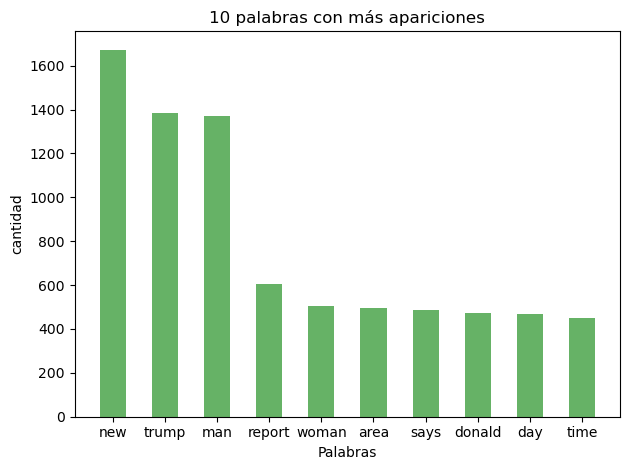

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Names and Quatities
name = list()
quantities = list()
for tupla in words_list[:10]:
  name.append(tupla[0])
  quantities.append(tupla[1])

# Number of groups
num_groups = 10  # Maybe it'll change
# Create the figure
fig, ax = plt.subplots()
# Define the X axis
indices = np.arange(num_groups)
# Width and opacity of histogram bars
bar_width = 0.5
opacity = 0.6
hist_names = plt.bar(indices, quantities, bar_width, 
                      alpha=opacity, color='g') 
plt.xlabel('Palabras')
plt.ylabel('cantidad')
plt.title('10 palabras con más apariciones')
plt.xticks(indices, name)
plt.tight_layout()
plt.show()

Se realiza un gráfico con las 500 palabras con más apariciones para visualizar de mejor manera el comportamiento de la curva:

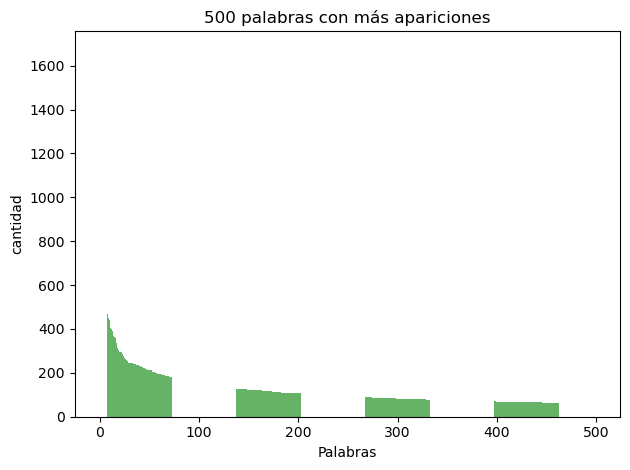

In [13]:
# Names and Quatities
name = list()
quantities = list()
for tupla in words_list[:500]:
  name.append(tupla[0])
  quantities.append(tupla[1])

# Number of groups
num_groups = 500  # Maybe it'll change
# Create the figure
fig, ax = plt.subplots()
# Define the X axis
indices = np.arange(num_groups)
# Width and opacity of histogram bars
bar_width = 0.5
opacity = 0.6
hist_names = plt.bar(indices, quantities, bar_width, 
                      alpha=opacity, color='g') 
plt.xlabel('Palabras')
plt.ylabel('cantidad')
plt.title('500 palabras con más apariciones')
#plt.legend()
plt.tight_layout()
plt.show()

De esta forma, es posible apreciar que son tres las palabras con cantidades sobre las 1000 apariciones ('new', 'trump' y 'man'). Las demás palabras poseen una cantidad de apariciones más similares con respecto a las palabras que se encuentran a su lado (estando ordenadas), es decir, con una menor desviación estándar tomándo en cuenta como conjunto todas las palabras excepto las tres con más apariciones. Debido a esto, la curva posee una forma semejante a la distribución exponencial por lo que es posible que dicha distribución represente el comportamiento de las palabras del archivo Sarcasm_Headlines_Dataset_v2.json.

### **Actividad 2**

Para preprocesar los datos se utilizó la estrategia **Bag of Words** (BoW), la cual extrae caracteríscticas del texto para aplicar a modelaciones. Esta representación entrega datos relacionados con la frecuencia de ocurrencia de las distintas palabras que aparecen en el texto que se desea codificar. Dichos datos pueden ser utilizados como set de entrenamiento para algoritmos de *Maching Learning*. Como los computadores no pueden trabajar directamente con texto sin procesar, especialmente cuando se está trabajando con aprendizaje de máquina, resulta conveniente convertir el texto en números, específicamente en vectores de números para describir la ocurrencia de palabras que es lo que esta estrategia. 

### **Actividad 3**

In [14]:
from sklearn.svm import SVC

Luego de realizar múltiples iteraciones haciendo variaciones de **C** y del respectivo kernel, los resultados más óptimos para el rendimiento son los siguientes:

*   C = 1.0 y Kernel = lineal  

In [15]:
params = {'C': 1.0, 'kernel': 'linear', 'gamma': 'scale'}
classifier_linear_1 = SVC(**params)
# Se entrena
classifier_linear_1.fit(features_train, y_train)

SVC(kernel='linear')

In [16]:
y_val_pred_linear_1 = classifier_linear_1.predict(features_val)

Se determina el rendimiento con el set de validación para cada configuración de clasificador. El rendimiento para el set de entrenamiento es agregado a la tabla de rendimiento general y comentado al final de esta actividad.

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred_linear_1)

0.8205730389854392

*   C = 10 y Kernel = linear

In [18]:
params = {'C': 10, 'kernel': 'linear', 'gamma': 'scale'}
classifier_linear_10 = SVC(**params)
# Se entrena
classifier_linear_10.fit(features_train, y_train)

SVC(C=10, kernel='linear')

In [19]:
y_val_pred_linear_10 = classifier_linear_10.predict(features_val)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred_linear_10)

0.7980272428370127

*   C = 1 y Kernel = rbf

In [21]:
params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}
classifier_rbf_1 = SVC(**params)
# Se entrena
classifier_rbf_1.fit(features_train, y_train)

SVC()

In [22]:
y_val_pred_rbf_1 = classifier_rbf_1.predict(features_val)

In [23]:
accuracy_score(y_val, y_val_pred_rbf_1)

0.8351338656646313

*   C = 10 y Kernel = rbf

In [24]:
params = {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
classifier_rbf_10 = SVC(**params)
# Se entrena
classifier_rbf_10.fit(features_train, y_train)

SVC(C=10)

In [25]:
y_val_pred_rbf_10 = classifier_rbf_10.predict(features_val)

In [26]:
accuracy_score(y_val, y_val_pred_rbf_10)

0.8464067637388445

*   C = 1 y Kernel = poly

In [27]:
params = {'C': 1.0,'kernel': 'poly', 'gamma': 'scale'}
classifier_poly_1 = SVC(**params)
# Se entrena
classifier_poly_1.fit(features_train, y_train)

SVC(kernel='poly')

In [28]:
y_val_pred_poly_1 = classifier_poly_1.predict(features_val)

In [29]:
accuracy_score(y_val, y_val_pred_poly_1)

0.7444809769844998


*   C = 10 y Kernel = poly



In [30]:
params = {'C': 1.0,'kernel': 'poly', 'gamma': 'scale'}
classifier_poly_10 = SVC(**params)
# Se entrena
classifier_poly_10.fit(features_train, y_train)

SVC(kernel='poly')

In [31]:
y_val_pred_poly_10 = classifier_poly_10.predict(features_val)

In [32]:
accuracy_score(y_val, y_val_pred_poly_10)

0.7444809769844998

Rendimiento final de todos los modelos

In [33]:
from sklearn.metrics import classification_report
print("#" * 30)
print("\nRendimiento final de todos los modelos en training\n")


print(classification_report(y_train, classifier_linear_1.predict(features_train), target_names=['c_1_linear_train', 'c_1_linear_train_sol']))
print(classification_report(y_train, classifier_linear_10.predict(features_train), target_names=['c_10_linear_train', 'c_10_linear_train_sol']))
print(classification_report(y_train, classifier_rbf_1.predict(features_train), target_names=['c_1_rbf_train', 'c_1_rbf_train_sol']))
print(classification_report(y_train, classifier_rbf_10.predict(features_train), target_names=['c_10_rbf_train', 'c_10_rbf_train_sol']))
print(classification_report(y_train, classifier_poly_1.predict(features_train), target_names=['c_1_poly_train', 'c_1_poly_train_sol']))
print(classification_report(y_train, classifier_poly_10.predict(features_train), target_names=['c_10_poly_train', 'c_10_poly_train_sol']))

print("\nRendimiento final de todos los modelos en validación\n")

print(classification_report(y_val, y_val_pred_linear_1, target_names=['c_1_linear_val', 'c_1_linear_val_sol']))
print(classification_report(y_val, y_val_pred_linear_10, target_names=['c_10_linear_val', 'c_10_linear_val_sol']))
print(classification_report(y_val, y_val_pred_rbf_1, target_names=['c_1_rbf_val', 'c_1_rbf_val_sol']))
print(classification_report(y_val, y_val_pred_rbf_10, target_names=['c_10_rbf_val', 'c_10_rbf_val_sol']))
print(classification_report(y_val, y_val_pred_poly_1, target_names=['c_1_poly_val', 'c_1_poly_val_sol']))
print(classification_report(y_val, y_val_pred_poly_10, target_names=['c_10_poly_val', 'c_10_poly_val_sol']))
print("#" * 30 + "\n")

##############################

Rendimiento final de todos los modelos en training

                      precision    recall  f1-score   support

    c_1_linear_train       0.99      0.99      0.99     10502
c_1_linear_train_sol       0.99      0.99      0.99      9566

            accuracy                           0.99     20068
           macro avg       0.99      0.99      0.99     20068
        weighted avg       0.99      0.99      0.99     20068

                       precision    recall  f1-score   support

    c_10_linear_train       1.00      1.00      1.00     10502
c_10_linear_train_sol       1.00      1.00      1.00      9566

             accuracy                           1.00     20068
            macro avg       1.00      1.00      1.00     20068
         weighted avg       1.00      1.00      1.00     20068

                   precision    recall  f1-score   support

    c_1_rbf_train       0.98      0.98      0.98     10502
c_1_rbf_train_sol       0.98      0.97   

Los cambios de **C** y **kernel** no son tan preponderantes en training ya que como esta es la etapa de entrenamiento, con todas las configuraciones posibles siempre se obtendrán buenos resultados. Los cambios y diferencias más significativas se visualizan en la etapa de validación. Como se utilizan conjuntos de datos aleatorios en cada iteración de configuraciones, para cada iteración el rendimiento del clasificador es diferente lo que permite asegurar que un clasificador es mejor o con mejor rendimiento que otro. 
Para un kernel de tipo lineal, se obtuvo que ha medida que se aumentaba el valor de c el rendimiento se deterioraba. Para rbf al aumentar hasta 10 el valor de c, el rendmiento mejora. Por último, para kernel tipo poly al aumentar c el rendimiento se mantiene.

### **Actividad 4**

El mejor clasificador SVM según el análisis de la actividad anterior se forma utilizando kernel = rbf y C = 10. El criterio utilizado para hacer la  selección es tomar en cuenta el rendimiento del clasificador con el comando ***accuracy_score(y_val, y_val_pred)***, escogiendo el con mejor resultado. 

Se instancia el modelo escogido:

In [34]:
params = {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
classifier_rbf_10 = SVC(**params)
# Se entrena
classifier_rbf_10.fit(features_train, y_train)

SVC(C=10)

In [35]:
y_val_pred_rbf_10 = classifier_rbf_10.predict(features_val)

El modelo posee un rendimiento de 0.846 aproximadamente.

In [36]:
accuracy_score(y_val, y_val_pred_rbf_10)

0.8464067637388445

Se evalúa el modelo en el conjunto de test:

In [37]:
y_test_pred_linear = classifier_rbf_10.predict(features_test)  


Rendimiento del test:

In [38]:
accuracy_score(y_test, y_test_pred_linear)

0.8455625436757512

Ejemplos
Tomándolos como valores 1s o 0s para visualizar de mejor manera las predicciones, junto con el texto que el programa sometio a prueba los valores obtenidos son:

In [39]:
# 20 primeras predicciones:

prediccion = y_test_pred_linear[:20]
testing = y_test[:20]
features = x_test[:20]

print("predicción solución texto")
for pred, sol, text in zip(prediccion, testing, features):
  print(pred, "         ", sol, "     ", text)

predicción solución texto
1           1       frantic last-second study finds old-fashioned donut better for you than bavarian cream
0           0       the 3 (unlikely) artists im obsessing over this year
1           1       madcap romp escalates into zany hijinks
0           0       the 7 stages of potty training
0           1       hubris rewarded
0           0       gop prays for ossoff lossoff
1           1       dad hands phone off to mom immediately after being wished happy fathers day
0           0       danielle laportes white hot truth soothes self-help fatigue
1           0       nikki lost 89 pounds any mom will tell you scheduling time to exercise can be very hard
1           1       redbox debuts new touchscreen in back of kiosk for pornographic features
0           0       a viewers guide to tonights democratic debate
1           1       boyfriend vows to try harder
0           1       charlie rose presses self about sexual harassment allegations in tense charlie rose in

Comentarios

Se puede visualizar que la mayoría de los errores que cometió el clasificador se produjeron en oraciones que poseen palabras poco conocidas o 'inventadas'. Esto no quita que haya acertado su predicción con palabras de este tipo, pero generalmente si hay una equivocación hay una o más palabras poco conocidas. No existe una relación entre el tamaño de la oración y la predicción; el algoritmo predijo correcta y equivocadamente oraciones de todo tipo de largo.

### **Actividad 5**

Redes Neuronales

In [40]:
from sklearn.neural_network import MLPClassifier

Se realizan diferentes iteraciones con configuraciones de redes neuronales cambiando la cantidad de capas y el tamaño de estas. Los resultados o redes neuronales más interesantes son:



*   3 Capas de tamaño 30



In [41]:
clf_3_30 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(30, 30, 30))

In [42]:
clf_3_30.fit(features_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=30, random_state=1)

In [43]:
y_pred_3_30 = clf_3_30.predict(features_val) 

In [44]:
cap1 = accuracy_score(y_val, y_pred_3_30)
print(cap1)

0.8142320338186942




*   1 Capa de tamaño 200



In [45]:
clf_1_200 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(200,))

In [46]:
clf_1_200.fit(features_train, y_train)

C:\Users\nicol\anaconda3\envs\stasc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200,), max_iter=30, random_state=1)

In [47]:
y_pred_1_200 = clf_1_200.predict(features_val) 

In [48]:
cap2 = accuracy_score(y_val, y_pred_1_200)
print(cap2)

0.8132926256458431




*   3 Capas de tamaño 200



In [49]:
clf_3_200 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(200, 200, 200)) 

In [50]:
clf_3_200.fit(features_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=30, random_state=1)

In [51]:
y_pred_3_200 = clf_3_200.predict(features_val) 

In [52]:
cap3 = accuracy_score(y_val, y_pred_3_200)
print(cap3)

0.8294974166275246




*   3 Capas de tamaño 50, 100 y 150 respectivamente



In [53]:
clf_3_50100150 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(50, 100, 150)) 

In [54]:
clf_3_50100150.fit(features_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 150), max_iter=30, random_state=1)

In [55]:
y_pred_3_50100150 = clf_3_50100150.predict(features_val) 

In [56]:
cap4 = accuracy_score(y_val, y_pred_3_50100150)
print(cap4)

0.823860967590418




*   5 Capas de tamaño 50, 100, 150, 200 y 250 respectivamente.



In [57]:
clf_5_50100150200250 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(50, 100, 150, 200, 250))

In [58]:
clf_5_50100150200250.fit(features_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 150, 200, 250), max_iter=30,
              random_state=1)

In [59]:
y_pred_5_50100150200250 = clf_5_50100150200250.predict(features_val) 

In [60]:
cap5 = accuracy_score(y_val, y_pred_5_50100150200250)
print(cap5)

0.8287928604978864


Grafico pérdida del conjunto de entrenamiento

In [61]:
loss_values_1 = clf_3_30.loss_curve_
loss_values_2 = clf_1_200.loss_curve_
loss_values_3 = clf_3_200.loss_curve_
loss_values_4 = clf_3_50100150.loss_curve_
loss_values_5 = clf_5_50100150200250.loss_curve_


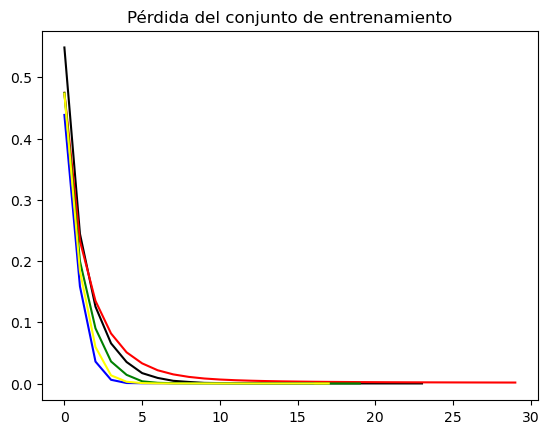

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(loss_values_1, color='black', label="3 capas de 30")
plt.plot(loss_values_2, color='r', label="1 capa de 200")
plt.plot(loss_values_3, color='blue', label="3 capas de 200")
plt.plot(loss_values_4, color='green', label="3 capas de 50, 100 y 150")
plt.plot(loss_values_5, color='yellow', label="5 Capas de 50, 100, 150, 200 y 250")
plt.title('Pérdida del conjunto de entrenamiento')
plt.show()

Gráfico exactitud en el conjunto de validación

In [63]:
quantities_1 = [cap1, cap2, cap3, cap4, cap5]
name_1 = ["cap 1", "cap 2", "cap 3", "cap 4", "cap 5"]

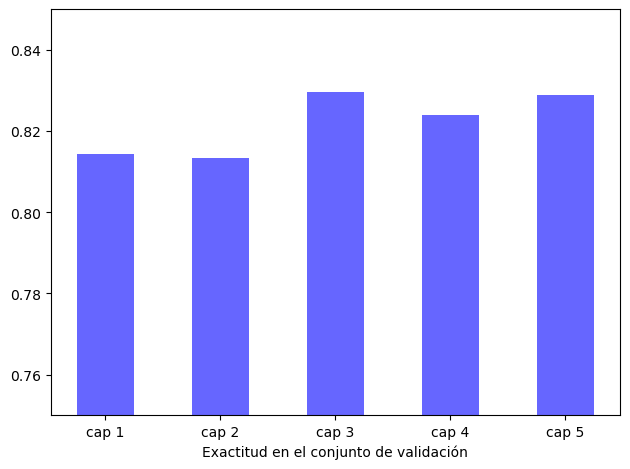

In [64]:
# Number of groups
num_groups = 5  # Maybe it'll change
# Create the figure
fig, ax = plt.subplots()
# Define the X axis
indices = np.arange(num_groups)
# Width and opacity of histogram bars
bar_width = 0.5
opacity = 0.6
hist_names = plt.bar(indices, quantities_1, bar_width, 
                      alpha=opacity, color='b') 
axes = plt.gca()
axes.set_ylim([0.75, 0.85])

plt.xlabel('Exactitud en el conjunto de validación')
plt.xticks(indices, name_1)
plt.tight_layout()
plt.show()

Tal que 


*   cap1: 3 Capas de tamaño 30.
*   cap2: 1 Capa de tamaño 200.
*   cap3: 3 Capas de tamaño 200.
*   cap4: 3 Capas de tamaños 50, 100 y 150.
*   cap5: 5 Capas de tamaños 50, 100, 150, 200 y 250.





### **Actividad 6**

La  mejor  red  neuronal  en  base  al  conjunto  de  validación es la con 3 capas con un tamaño de 200 cada una. Se define la estructura:

In [65]:
clf_3_200 = MLPClassifier(solver='adam', random_state=1, max_iter=30, hidden_layer_sizes=(200, 200, 200)) 

In [66]:
clf_3_200.fit(features_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=30, random_state=1)

In [67]:
y_pred_3_200 = clf_3_200.predict(features_val) 

In [68]:
accuracy_score(y_val, y_pred_3_200)

0.8294974166275246

Se reporta la exactitud en el set de test:

In [69]:
y_pred_neurn = clf_3_200.predict(features_test) 

In [70]:
accuracy_score(y_test, y_pred_neurn)

0.8397391101793618

In [71]:
print("#" * 30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_pred_neurn, target_names=['Class 0', 'Class 1']))
print("#" * 30 + "\n")

##############################

Classification report on test dataset

              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.85      2246
     Class 1       0.85      0.80      0.83      2047

    accuracy                           0.84      4293
   macro avg       0.84      0.84      0.84      4293
weighted avg       0.84      0.84      0.84      4293

##############################



Comentarios

Es posible visualizar que la red neuronal tuvo mejores resultados en el set de test que en el de validación, con valores de 0.839 y 0.829 respectivamente. Esto se debe a que la red neuronal continúa 'aprendiendo' o guardando información durante la validación, información que es utilizada para relizar las predicciones en la etapa de testing. 

### **Actividad 7**

Ocupando los resutlados del testing, se retornan valores 1s o 0s para visualizar de mejor manera las predicciones, los valores obtenidos son:

In [72]:
prediccion_neur = y_pred_neurn[:20]
testing = y_test[:20]
phrases = x_test[:20]

print("predicción solución oración")
for pred, sol, text in zip(prediccion_neur, testing, phrases):
  print(pred, "          ", sol, "    ", text)

predicción solución oración
1            1      frantic last-second study finds old-fashioned donut better for you than bavarian cream
0            0      the 3 (unlikely) artists im obsessing over this year
0            1      madcap romp escalates into zany hijinks
0            0      the 7 stages of potty training
0            1      hubris rewarded
0            0      gop prays for ossoff lossoff
1            1      dad hands phone off to mom immediately after being wished happy fathers day
0            0      danielle laportes white hot truth soothes self-help fatigue
1            0      nikki lost 89 pounds any mom will tell you scheduling time to exercise can be very hard
1            1      redbox debuts new touchscreen in back of kiosk for pornographic features
0            0      a viewers guide to tonights democratic debate
1            1      boyfriend vows to try harder
0            1      charlie rose presses self about sexual harassment allegations in tense charlie rose 

Comparación con los resultados del clasificador SVM

Ocupando el segmento de ejemplos retornado, es posible verificar que todas las oraciones en las que SVM entregó una predicción errónea, también lo hizo la red neuronal. No es suficiente para afirmar que la red neuronal incluirá siempre los errores del clasificador SVM, pero es importante señalar que se produjo dicha relación. Esto puede ser debido por la naturaleza de las palabras; algunas poseen muy pocas apariciones en las oraciones, mientras que otras son palabras 'inventadas'. De todas formas, en las acctividades la red neuronal escogida posee una menor precisión señalada en el set de testing, en comparación con el clasificador SVM escogido, por lo que también es posible visualizar que el segmento de ejemplos de la red neuronal posee más errores que el clasificador SVM.

## **Referencias**

[1] Python Machine Learning Cookbook